In [1]:
import sys
sys.path.append('/home/anouk/anouk2/graph_Fosc2.0/scripts/') 
import pandas as pd
import analyse_communities as a_comm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
indir = '/home/anouk/anouk2/graph_Fosc2.0/communitites/95-2500-50000-0.01/'
genome = 'GCA_016801315.1_Fo_capsici_1'#'GCA_000149955.2_Fo_lycopersici4287_1'#
out_bed = f'{genome}_bed_targets.bed'
outdir = 'chrom_overview'

In [3]:
def make_bed_paf(paf, indir, comm_dict, genome = 'all'):
    #comm_dict = a_comm.get_comm_dict(indir)
    collection = []
    query = False
    target = False
    with open(paf) as paffile:
        for line in paffile:
            line = line.strip().split('\t')
            if genome == 'all':
                #parse paf
                chrom = line[0]
                start = line[2]
                stop = line[3]
                full_len_q = str(int(line[1]) - (int(line[3]) - int(line[2])))
                full_len_t = str(int(line[6]) - (int(line[8]) - int(line[7])))
                pid = line[-1].split(':')[-1]
                try:
                    comm = comm_dict[line[5]]
                except KeyError:
                    comm = 'unkown'
                info = '-'.join([line[5], line[7], line[8], line[6], full_len_q, full_len_t,pid,comm])
                collection.append([chrom, start, stop, info])
                
            if genome != 'all':
                #get target and query
                if genome in line[0]:
                    query = True
                    target = False
                elif genome in line[5]:
                    target = True
                    query = False
                else:
                    query = False
                    target = False

                if query:
                    chrom = line[0]
                    start = line[2]
                    stop = line[3]
                    full_len_q = str(int(line[1]) - (int(line[3]) - int(line[2])))
                    full_len_t = str(int(line[6]) - (int(line[8]) - int(line[7])))
                    pid = line[-1].split(':')[-1]
                    try:
                        comm = comm_dict[line[5]]
                    except KeyError:
                        comm = 'unkown'
                    info = '-'.join([line[5], line[7], line[8], line[6], full_len_q, full_len_t,pid,comm])
                elif target:
                    chrom = line[5]
                    start = line[7]
                    stop = line[8]
                    full_len_q = str(int(line[6]) - (int(line[8]) - int(line[7])))
                    full_len_t = str(int(line[1]) - (int(line[3]) - int(line[2])))
                    pid = line[-1].split(':')[-1]
                    try:
                        comm = comm_dict[line[0]]
                    except KeyError:
                        comm = 'unkown'
                    info = '-'.join([line[0], line[2], line[3], line[1], full_len_q, full_len_t, pid,comm])

                if target or query:
                    #print(chrom)
                    collection.append([chrom, start, stop, info])
    return collection

def write_out(to_write, output):
    with open(output, 'w+') as of:
        for line in to_write:
            of.write('\t'.join(line))
            of.write('\n')
    return

In [4]:
!echo $outdir/w100000_${genome}.bed


chrom_overview/w100000_.1_Fo_capsici_1.bed


In [5]:
!bedtools makewindows -g /home/anouk/anouk2/graph_Fosc2.0/genomes/new_set/clean_data/GCA_016801315.1_Fo_capsici_1.clean.fa.fai -w 100000 > $outdir/w100000_${genome}.bed

In [6]:
!ls $outdir

GCA_000149955.2_Fo_lycopersici4287_1_bed_targets.bed
GCA_016801315.1_Fo_capsici_1_bed_targets.bed
intersect_windows_.1_Fo_capsici_1.bed
intersect_windows_.2_Fo_lycopersici4287_1.bed
w100000_.1_Fo_capsici_1.bed
w100000_.2_Fo_lycopersici4287_1.bed


In [7]:
scaff_comm_dict = a_comm.get_comm_dict('../communitites/flagN/95-2500-50000-0.01/')

In [8]:
#make_bed_paf('../out.paf', indir, 'GCA_016801315.1_Fo_capsici_1')
bed_lines = make_bed_paf(f'{indir}/out.paf', indir, scaff_comm_dict, genome)
print([x[0] for x in bed_lines])
write_out(bed_lines, f'{outdir}/{out_bed}')

['GCA_016801315.1_Fo_capsici_1#scaffold2', 'GCA_016801315.1_Fo_capsici_1#scaffold2', 'GCA_016801315.1_Fo_capsici_1#scaffold2', 'GCA_016801315.1_Fo_capsici_1#scaffold2', 'GCA_016801315.1_Fo_capsici_1#scaffold1', 'GCA_016801315.1_Fo_capsici_1#scaffold5', 'GCA_016801315.1_Fo_capsici_1#scaffold5', 'GCA_016801315.1_Fo_capsici_1#scaffold5', 'GCA_016801315.1_Fo_capsici_1#scaffold3', 'GCA_016801315.1_Fo_capsici_1#scaffold1', 'GCA_016801315.1_Fo_capsici_1#scaffold1', 'GCA_016801315.1_Fo_capsici_1#scaffold1', 'GCA_016801315.1_Fo_capsici_1#scaffold1', 'GCA_016801315.1_Fo_capsici_1#scaffold1', 'GCA_016801315.1_Fo_capsici_1#scaffold1', 'GCA_016801315.1_Fo_capsici_1#scaffold6', 'GCA_016801315.1_Fo_capsici_1#scaffold7', 'GCA_016801315.1_Fo_capsici_1#scaffold3', 'GCA_016801315.1_Fo_capsici_1#scaffold5', 'GCA_016801315.1_Fo_capsici_1#scaffold2', 'GCA_016801315.1_Fo_capsici_1#scaffold2', 'GCA_016801315.1_Fo_capsici_1#scaffold2', 'GCA_016801315.1_Fo_capsici_1#scaffold2', 'GCA_016801315.1_Fo_capsici_1#sca

In [9]:
!cat $outdir/GCA_016801315.1_Fo_capsici_1_bed_targets.bed

GCA_016801315.1_Fo_capsici_1#scaffold2	153496	4683633	36102_Fo_cubense_6#scaffold2-47500-4630000-6373259-2129443-1790759-98.48-1
GCA_016801315.1_Fo_capsici_1#scaffold2	4809757	6040959	36102_Fo_cubense_6#scaffold2-4627500-5867500-6373259-5428378-5133259-98.1023-1
GCA_016801315.1_Fo_capsici_1#scaffold2	6063915	6156807	36102_Fo_cubense_6#scaffold2-5902500-5990000-6373259-6566688-6285759-92.3353-1
GCA_016801315.1_Fo_capsici_1#scaffold2	6371589	6620576	36102_Fo_cubense_6#scaffold2-6075000-6352500-6373259-6410593-6095759-95.8232-1
GCA_016801315.1_Fo_capsici_1#scaffold1	123247	3406599	36102_Fo_cubense_6#scaffold3-1725000-5040000-5089469-4554881-1774469-98.3171-2
GCA_016801315.1_Fo_capsici_1#scaffold5	1269395	1736465	36102_Fo_cubense_6#scaffold4-3272500-3740000-4861540-4495598-4394040-98.1384-3
GCA_016801315.1_Fo_capsici_1#scaffold5	1739940	1834922	36102_Fo_cubense_6#scaffold4-3150000-3245000-4861540-4867686-4766540-95.8026-3
GCA_016801315.1_Fo_capsici_1#scaffold5	1834932	4962646	36102_Fo_cube

In [10]:
!bedtools intersect -a $outdir/w100000_${genome}.bed -b 'chrom_overview/GCA_016801315.1_Fo_capsici_1_bed_targets.bed' -wao > $outdir/intersect_windows_${genome}.bed

In [11]:
#!bedtools intersect -a $outdir/w100000_${genome}.bed -b 'chrom_overview/GCA_000149955.2_Fo_lycopersici4287_1_bed_targets.bed' -wao > $outdir/intersect_windows_${genome}.bed

In [12]:
chrom_comm_dict = {}
with open(f'{outdir}/intersect_windows_.1_Fo_capsici_1.bed') as infile:
    for line in infile:
        chrom, start, stop, match1, start1, stop1, info1, len_match = line.strip().split('\t')
        identifier = f'{chrom}-{start}-{stop}'
        try:
            chrom_comm_dict[identifier].append(info1)
        except KeyError:
            chrom_comm_dict[identifier] = [info1]

In [13]:
for k,v in chrom_comm_dict.items():
        if k.startswith(f'{genome}#scaffold16-'):
            print(v)

['Foc013_Fo_10#scaffold11-1725831-1796802-1818594-854007-1747623-93.4995-9', '36102_Fo_cubense_6#scaffold10-764099-911528-2521563-776507-2374134-95.3117-9', 'C058_Fo_cubense_8#scaffold11-1665538-2108012-2496097-471507-2053623-96.3849-9', 'C081_Fo_cubense_9#scaffold11-183525-836367-2478473-234007-1825631-97.0473-9', 'C135_Fo_cubense_10#scaffold10-164801-835854-2481015-234007-1809962-97.0079-9', 'CR1.1_Fo_cubense_5#scaffold11-1793331-2395516-2597866-346507-1995681-96.2742-9', 'Foc015_Fo_11#scaffold10-226632-944204-2920469-234007-2202897-97.8952-9', 'Fol007_Fo_lycopersici_1#scaffold12-77612-825818-2414900-299007-1666694-96.6175-9', 'Fol029_Fo_lycopersici_2#scaffold10-1868397-2613883-2711150-299007-1965664-96.6011-9', 'FolMN25_Fo_lycopersici_3#scaffold11-1766375-2415752-2440163-299007-1790786-96.4307-9', 'Fom010_Fo_melonis_1#scaffold11-16704-752018-2374918-236507-1639604-97.4581-9', 'Fom011_Fo_melonis_2#scaffold13-1823059-1955259-1956121-794007-1823921-96.2592-9', 'Fom014_Fo_melonis_3#scaf

In [14]:
import matplotlib as mpl

cmap = mpl.cm.get_cmap('tab20')


In [15]:
scaff_comm_dict[f'{genome}#scaffold16']

'9'

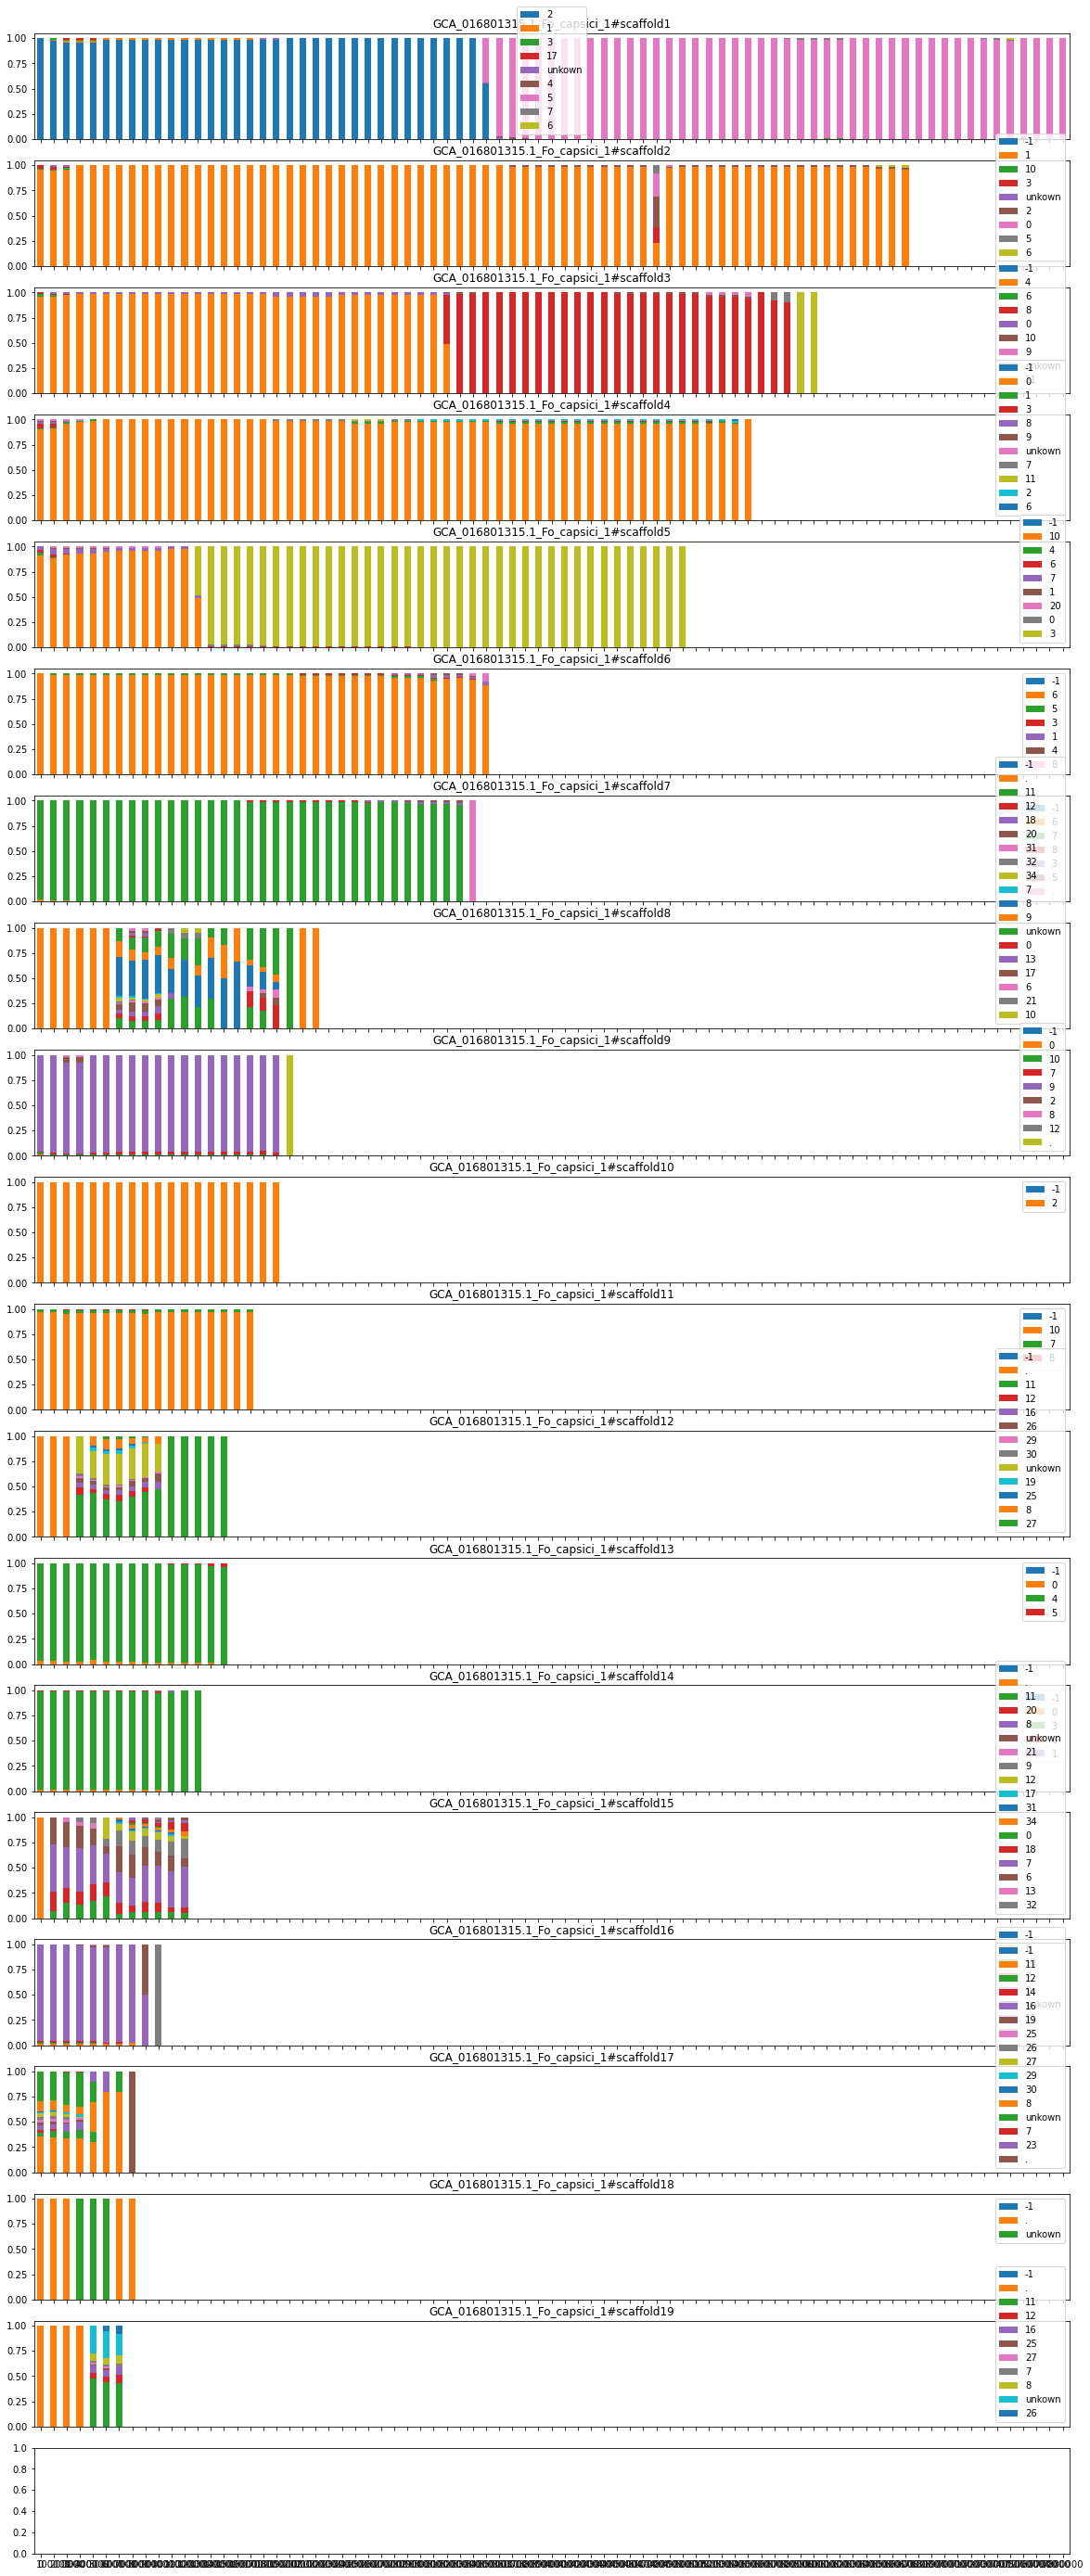

In [16]:
fig, ax = plt.subplots(nrows = 20, figsize = (20, 50), sharex = True)

indices = []
all_dict = {}

for i in range(1,20):
    plot_chrom_comm_bar = {}
    comms = []
    if len(indices) > 0:
        for indi in indices:
            plot_chrom_comm_bar[indi] = {-1:0}
                
    for k,v in chrom_comm_dict.items():
        if k.startswith(f'{genome}#scaffold{i}-'):
            ind = int(k.split('#')[1].split('-')[1])
            
            if i == 1:
                indices.append(ind)
                plot_chrom_comm_bar[ind] = {}          

            comm_u, counts = np.unique(([x.split('-')[-1] for x in v]), return_counts = True)
            counts = counts/sum(counts)

            for ic, c in enumerate(comm_u):
                plot_chrom_comm_bar[ind][c] = counts[ic] 
            
            [comms.extend(x.split('-')[-1]) for x in v]
    comm_u, counts =  np.unique(comms, return_counts = True)
    
    all_dict[f'scaffold{i}'] = plot_chrom_comm_bar
    
    #print(f'{genome}#scaffold{i}:',comm_u, counts/sum(counts))
    if len(plot_chrom_comm_bar) > 0:
    
        pd.DataFrame(plot_chrom_comm_bar).T.plot.bar(stacked = True, ax = ax[i-1])
    
        ax[i-1].set_title(f'{genome}#scaffold{i}')
    else:
        continue 
        
plt.show()

In [17]:
def collect_stats(comm_dict, majority):
    #stats to collect
    majority_expected = 0
    majority_unexpected = 0
    full_support = 0
    inbetween = 0
    low_support = 0
    candidate_comms = {}
    other_windows = {}
    
    for window, comms_window in comm_dict.items():

            window_comm = max(comms_window, key=comms_window.get)
            value = max(comms_window.values())
            if window_comm == majority and value >= 0.9:
                majority_expected += 1
                full_support += 1
            elif window_comm == majority and (value >= 0.5 and value < 0.9):
                majority_expected += 1
                inbetween += 1
            elif window_comm == majority and (value < 0.5):
                majority_expected += 1
                low_support += 1    
            elif value == 0:
                'no_mappings'
            else:
                majority_unexpected += 1
                
                #list alternative comms
                try:
                    candidate_comms[window_comm].append(value)
                except KeyError:
                    candidate_comms[window_comm] = [value]
             
                other_windows[window] = window_comm
                    
            #current window to previous window before new itteration
            prev_window = window
    
    
    return {'expected': majority_expected, 'unexpected': majority_unexpected,\
                                    'full support': full_support, 'inbetween' : inbetween, 'low_support': low_support, \
                                    'candidates':candidate_comms}

In [18]:
no_majority = False

scaff_stats_comms = {}

for scaff, comm_dict in all_dict.items():
    
    switch_window = -1
    switch = False
    
    other_windows = {}
    
    try:
        majority = scaff_comm_dict[f'{genome}#{scaff}']
    except KeyError:
        print(f'{genome}#{scaff}', '?')
        no_majority = True
    
    if not no_majority:
        stats_dict = collect_stats(comm_dict, majority)
                
    scaff_stats_comms[scaff] = stats_dict
        
    print(scaff, majority, other_windows)
    


scaffold1 2 {}
scaffold2 1 {}
scaffold3 4 {}
scaffold4 0 {}
scaffold5 3 {}
scaffold6 6 {}
scaffold7 7 {}
GCA_016801315.1_Fo_capsici_1#scaffold8 ?
scaffold8 7 {}
scaffold9 9 {}
scaffold10 2 {}
scaffold11 10 {}
scaffold12 11 {}
scaffold13 4 {}
scaffold14 3 {}
scaffold15 8 {}
scaffold16 9 {}
GCA_016801315.1_Fo_capsici_1#scaffold17 ?
scaffold17 9 {}
GCA_016801315.1_Fo_capsici_1#scaffold18 ?
scaffold18 9 {}
GCA_016801315.1_Fo_capsici_1#scaffold19 ?
scaffold19 9 {}


In [19]:
scaff_stats_comms

{'scaffold1': {'expected': 35,
  'unexpected': 44,
  'full support': 34,
  'inbetween': 1,
  'low_support': 0,
  'candidates': {'5': [0.9710144927536232,
    0.9859154929577465,
    0.9863013698630136,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    0.9930555555555556,
    0.9861111111111112,
    0.9863013698630136,
    0.972972972972973,
    0.9736842105263158,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    1.0,
    0.9929078014184397,
    0.9857142857142858,
    0.9583333333333334,
    0.9827586206896551,
    1.0,
    1.0,
    1.0]}},
 'scaffold2': {'expected': 66,
  'unexpected': 1,
  'full support': 66,
  'inbetween': 0,
  'low_support': 0,
  'candidates': {'2': [0.3076923076923077]}},
 'scaffold3': {'expected': 31,
  'unexpected': 29,
  'full support': 31,
  'inbetween': 0,
  'low_support': 0,
  'candidates': {'8': [0.

GCA_016801315.1_Fo_capsici_1#scaffold1: {'unkown', '5', '6', '4', '17', '3', '1', '7', '2'}
GCA_016801315.1_Fo_capsici_1#scaffold2: {'unkown', '5', '10', '6', '0', '3', '1', '2'}
GCA_016801315.1_Fo_capsici_1#scaffold3: {'unkown', '8', '10', '6', '0', '4', '9', '11'}
GCA_016801315.1_Fo_capsici_1#scaffold4: {'unkown', '8', '6', '0', '9', '3', '11', '1', '7', '2'}
GCA_016801315.1_Fo_capsici_1#scaffold5: {'10', '6', '4', '0', '20', '3', '1', '7'}
GCA_016801315.1_Fo_capsici_1#scaffold6: {'8', '5', '6', '4', '3', '1'}
GCA_016801315.1_Fo_capsici_1#scaffold7: {'8', '5', '6', '3', '.', '7'}
GCA_016801315.1_Fo_capsici_1#scaffold8: {'12', 'unkown', '8', '13', '7', '6', '0', '10', '9', '20', '17', '32', '11', '.', '34', '18', '21', '31'}
GCA_016801315.1_Fo_capsici_1#scaffold9: {'12', '8', '10', '0', '9', '.', '7', '2'}
GCA_016801315.1_Fo_capsici_1#scaffold10: {'2'}
GCA_016801315.1_Fo_capsici_1#scaffold11: {'7', '8', '10'}
GCA_016801315.1_Fo_capsici_1#scaffold12: {'12', 'unkown', '8', '16', '30', '

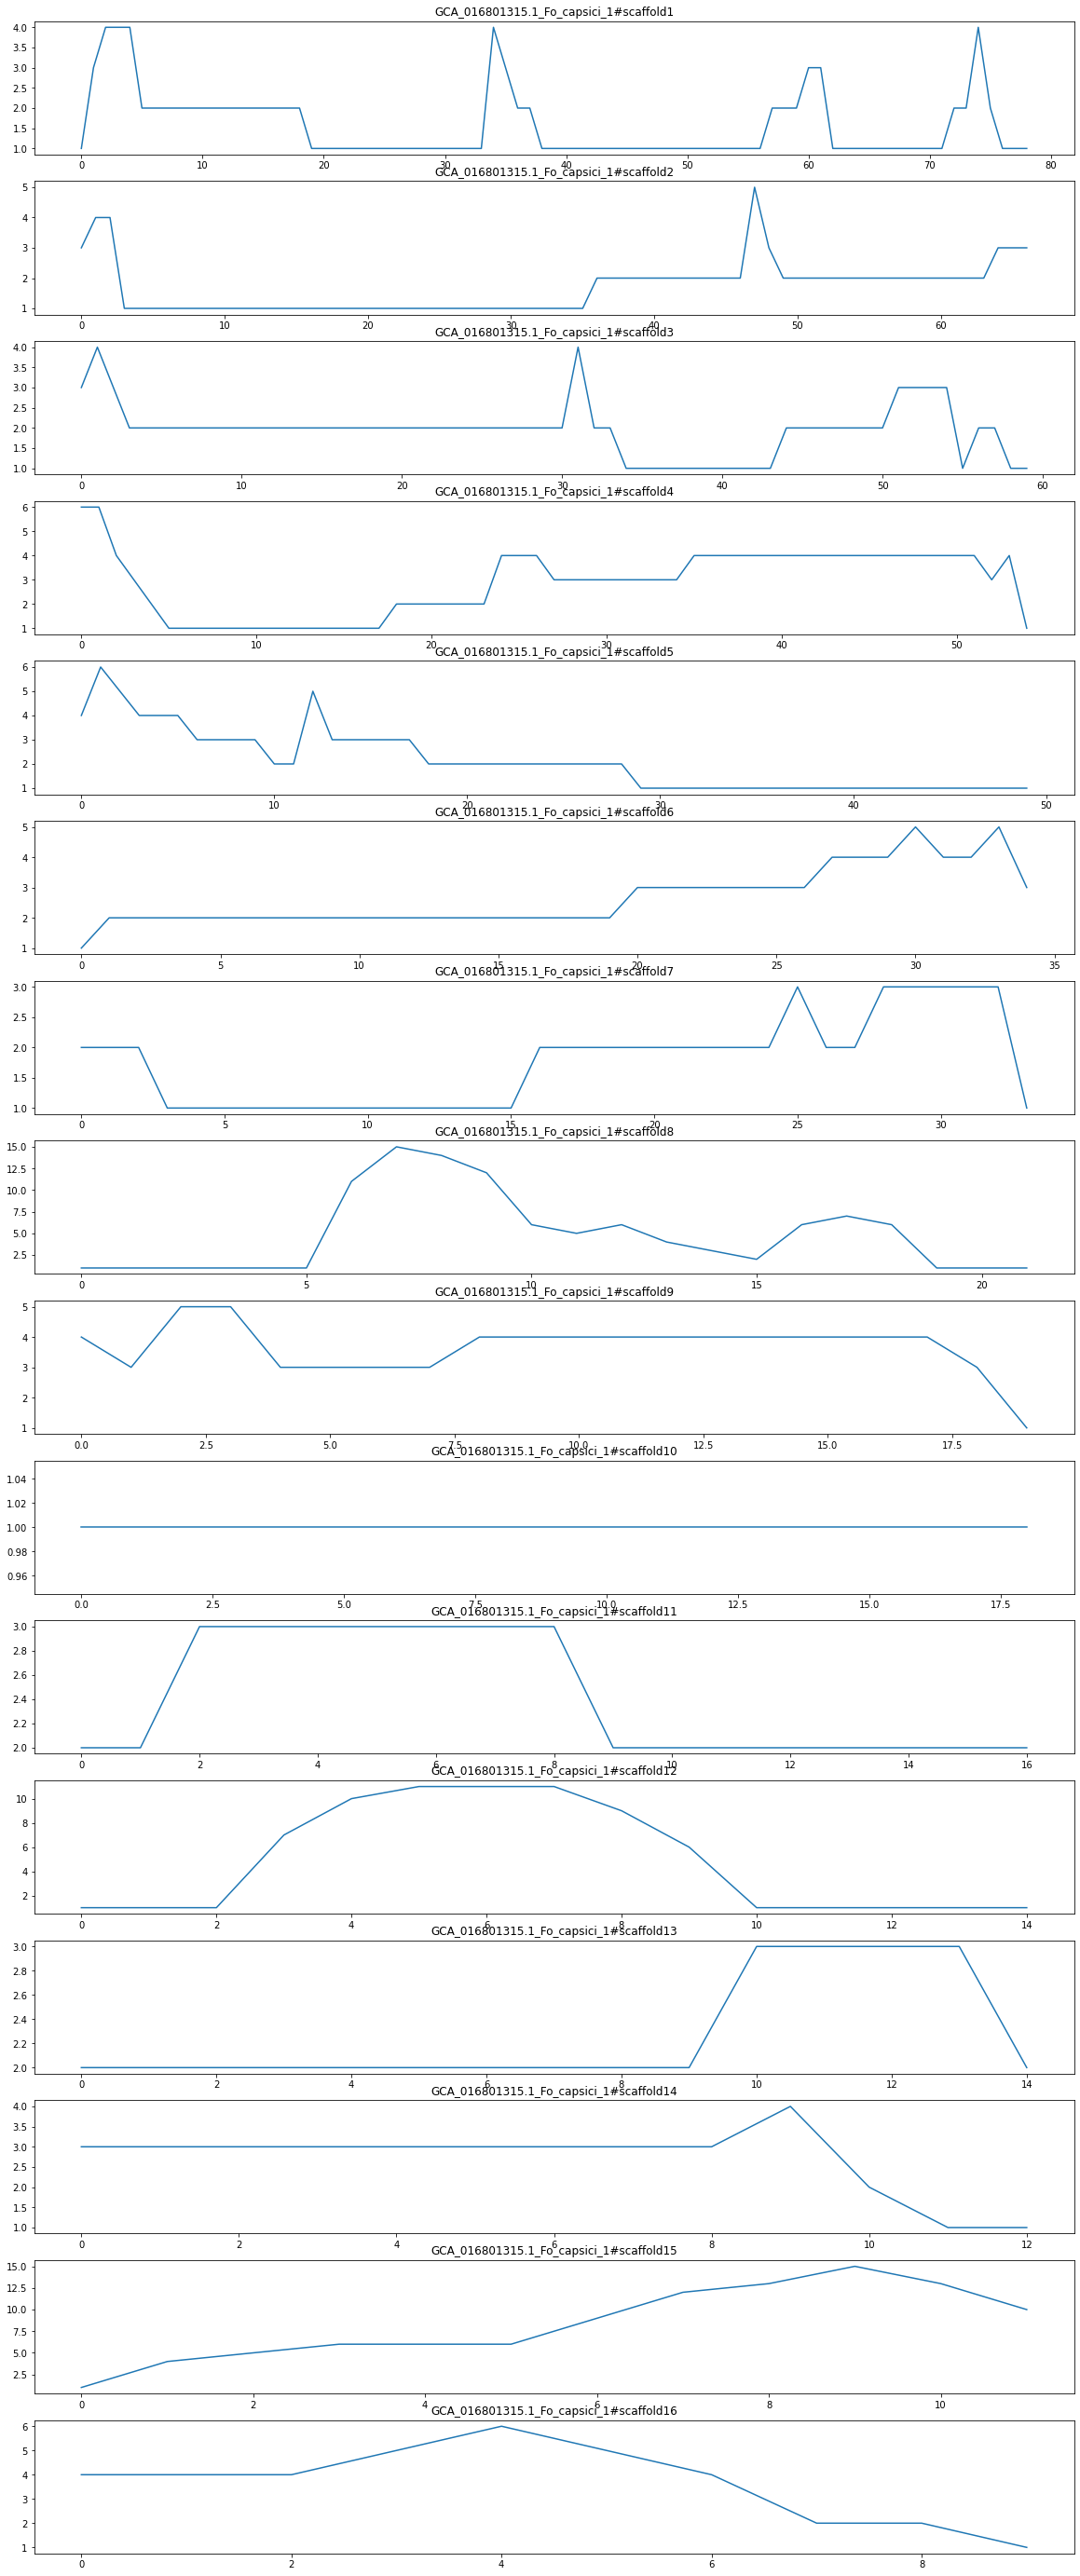

In [20]:
fig, ax = plt.subplots(nrows = 16, figsize = (20, 50))

for i in range(1,17):
    plot_chrom_comm= []
    comms = set()
    for k,v in chrom_comm_dict.items():
        if k.startswith(f'{genome}#scaffold{i}-'):
            plot_chrom_comm.append(len(set([x.split('-')[-1] for x in v])))
            [comms.add(x.split('-')[-1]) for x in v]
    print(f'{genome}#scaffold{i}:', comms)
    
    ax[i-1].plot(plot_chrom_comm)
    
    ax[i-1].set_title(f'{genome}#scaffold{i}')

plt.show()

In [21]:
cc = {k:np.unique([x.split('-')[-1] for x in v], return_counts = True) for k,v in chrom_comm_dict.items() \
           if k.startswith(f'GCA_000149955.2_Fo_lycopersici4287_1#scaffold15-')}



IndexError: list index out of range

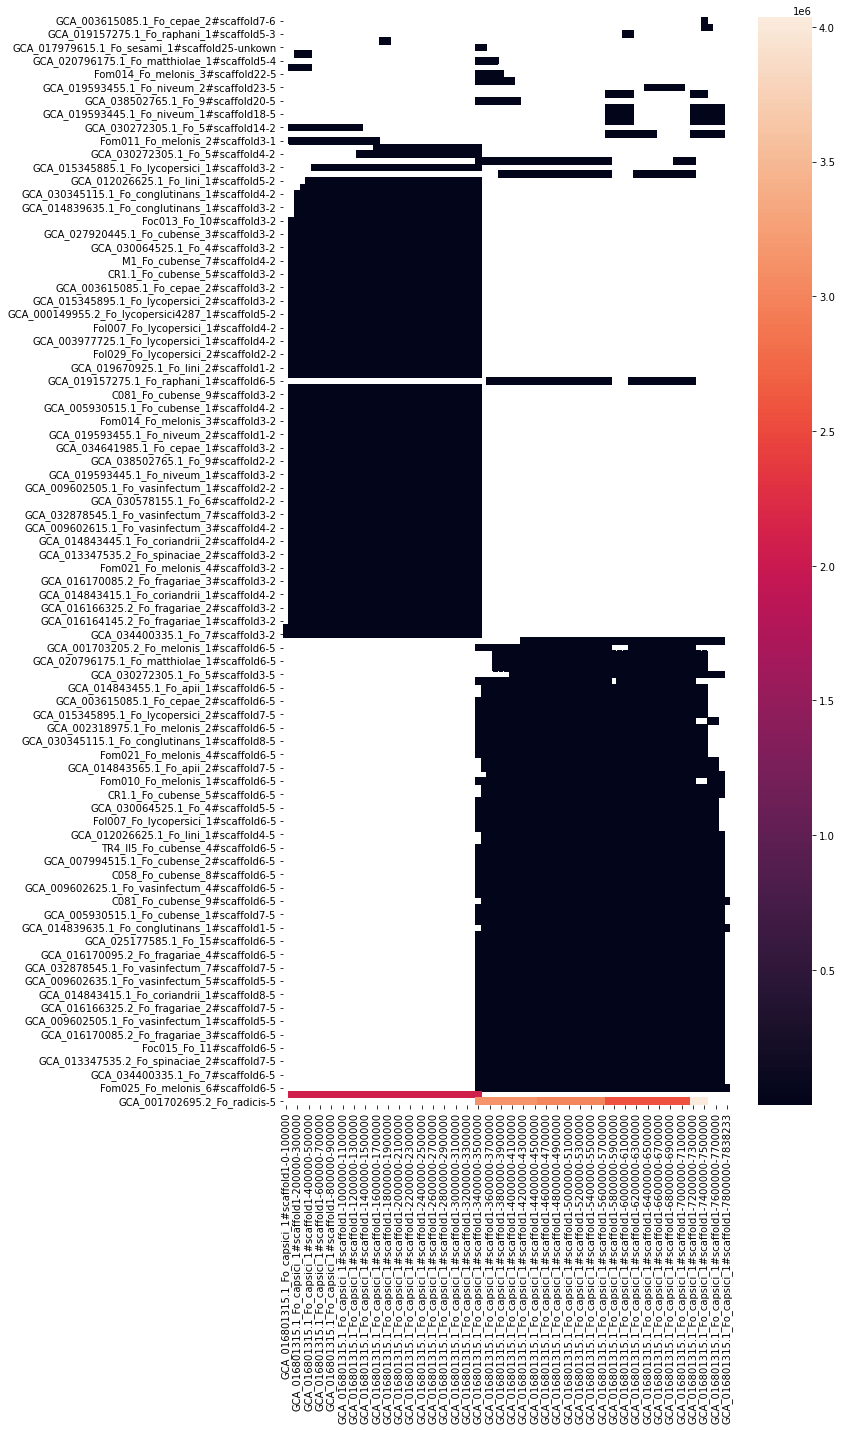

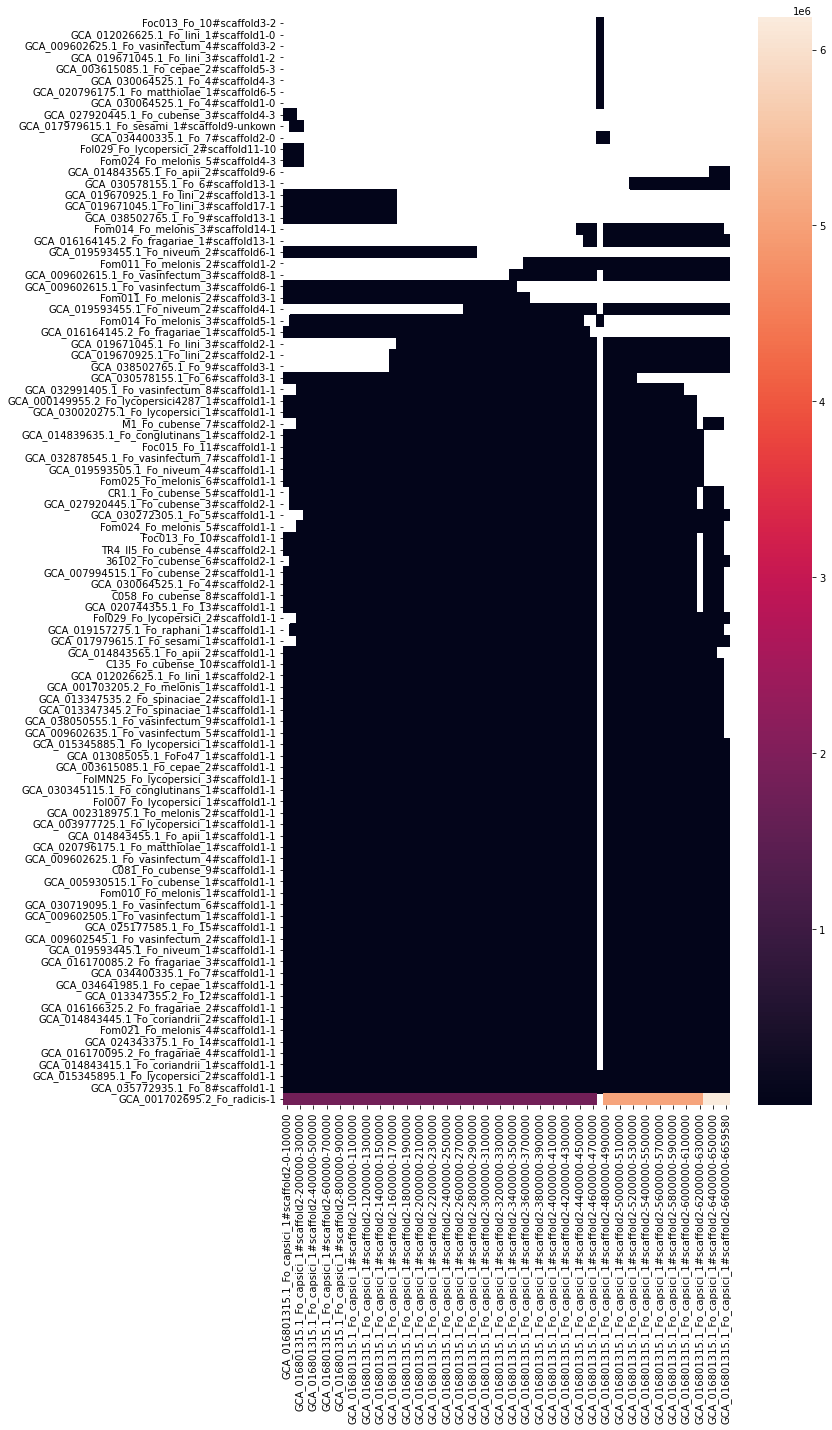

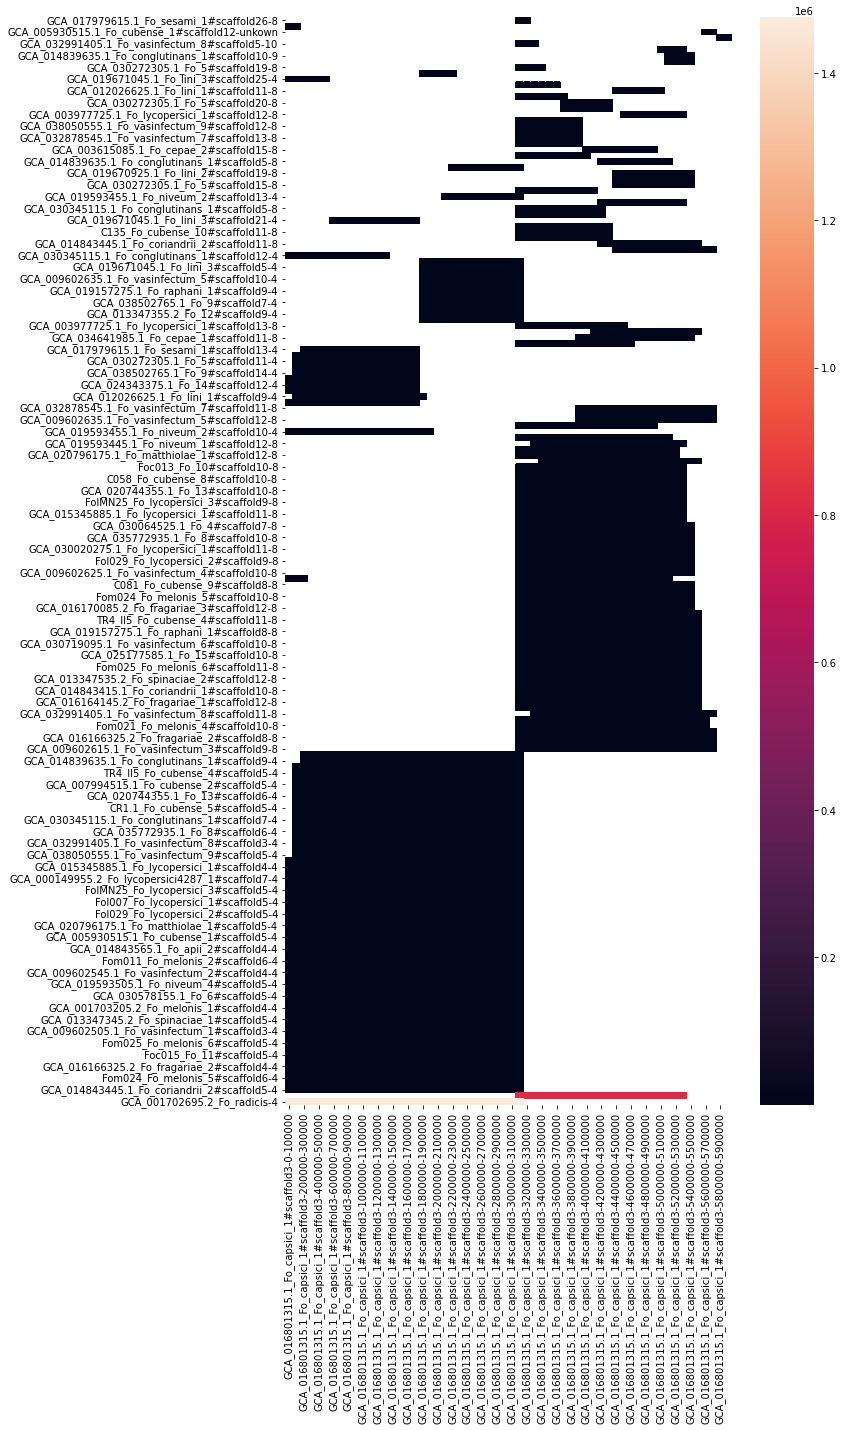

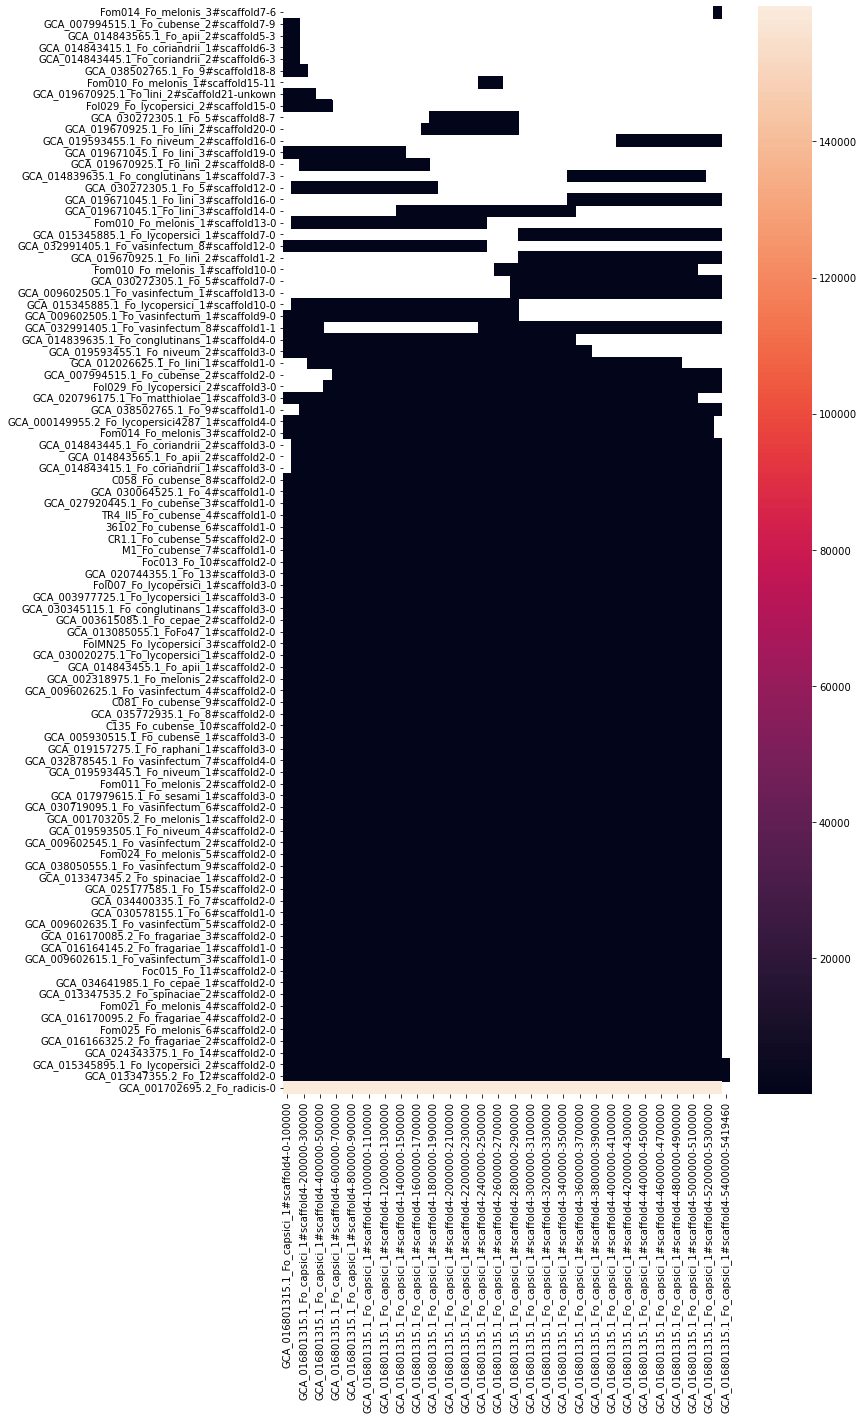

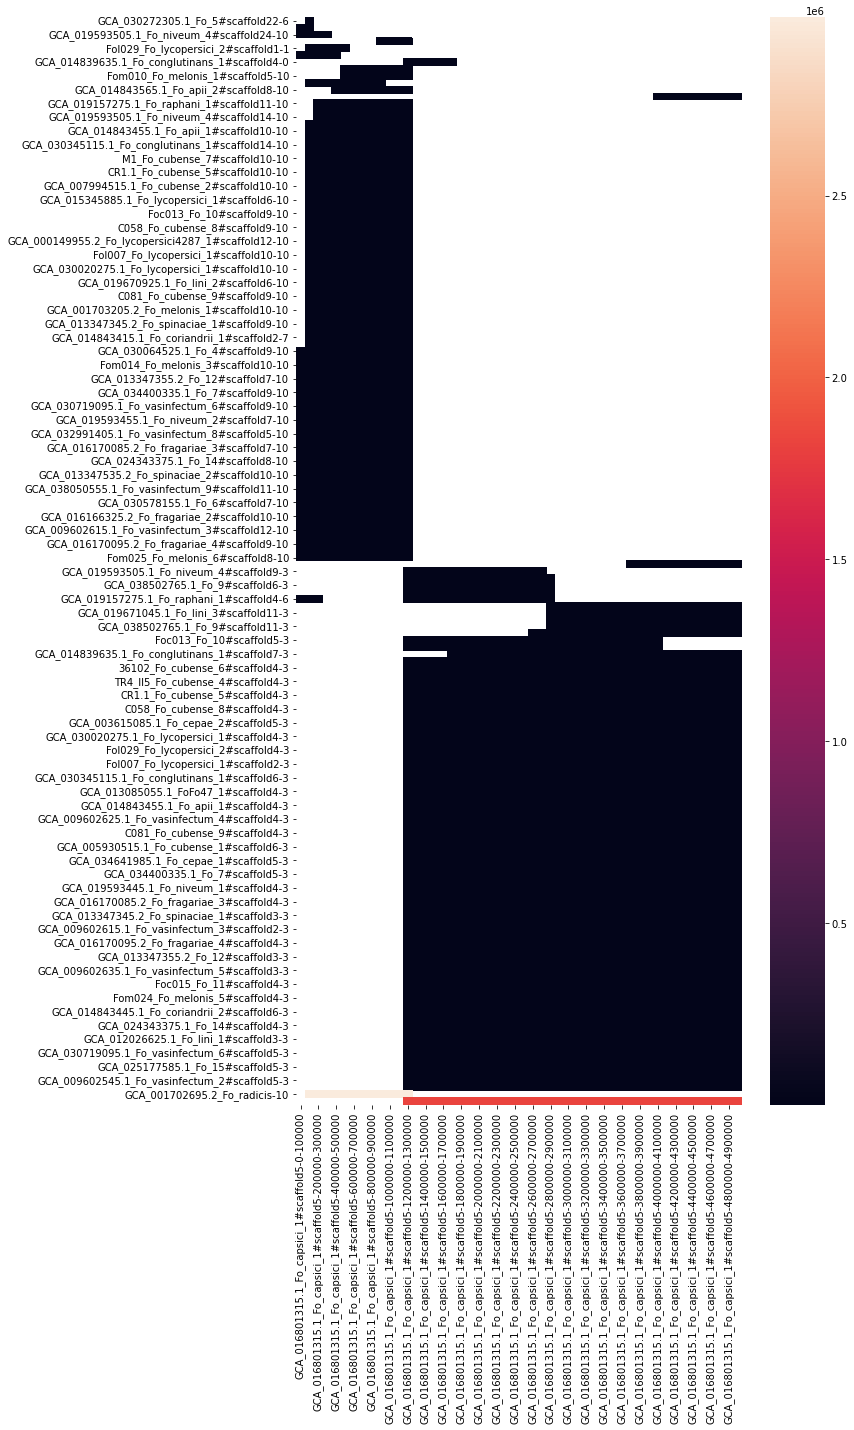

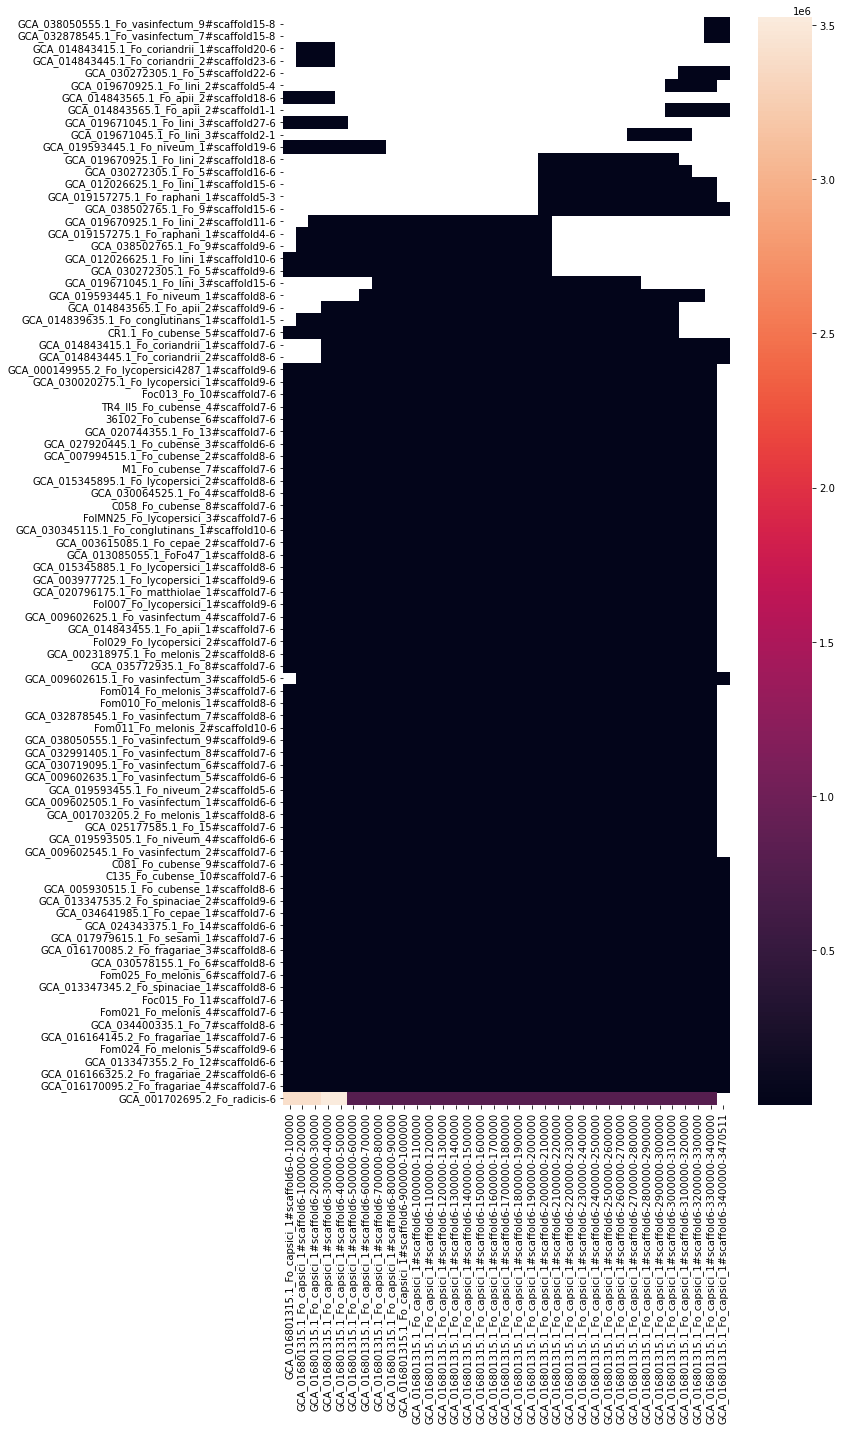

In [22]:
for i in range(1,17):
    cc = {k:{f'{x.split("-")[0]}-{x.split("-")[-1]}':float(x.split('-')[6]) for x in v} for k,v in chrom_comm_dict.items() \
           if k.startswith(f'{genome}#scaffold{i}-')}
    
    temp_df = pd.DataFrame(cc)
    temp_df['sums'] = temp_df.sum(axis = 1)
    temp_df = temp_df.sort_values('sums')
    temp_df = temp_df.drop('sums', axis = 1)
    
    plt.subplots(figsize = (10,20))
    sns.heatmap(pd.DataFrame(temp_df))
    

In [ ]:
all_nodes = make_bed_paf('../out.paf', indir)


In [ ]:
nodes_dict = {}
for v in all_nodes:
    node = v[0]
    link = v[-1].split('-')[-1]
    comm_node = scaff_comm_dict[node]
    
    try:
        nodes_dict[node]
    except KeyError:
        nodes_dict[node] = {}
        nodes_dict[node]['internal-link'] = 0
        nodes_dict[node]['external-link'] = 0
    
    if link == comm_node:
        try:
            nodes_dict[node]['internal-link'] += 1
        except KeyError:
            nodes_dict[node]['internal-link'] = 1
    else:
        try:
            nodes_dict[node]['external-link'] += 1
        except KeyError:
            nodes_dict[node]['external-link'] = 1
    

In [ ]:
nodes_dict

In [ ]:
plt.scatter([v['internal-link'] for v in nodes_dict.values()], [v['external-link'] for v in nodes_dict.values()])

In [4]:
import os
import json

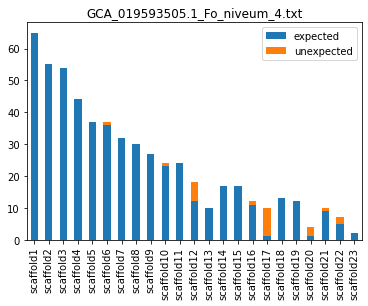

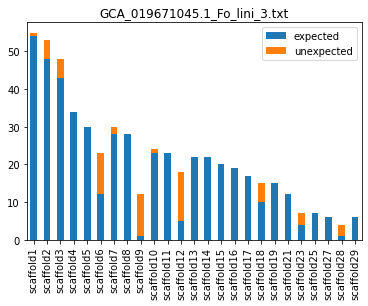

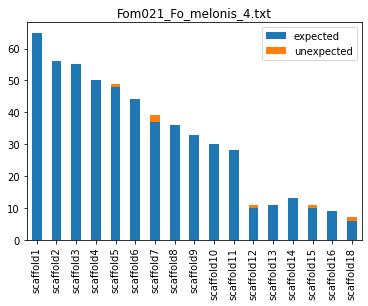

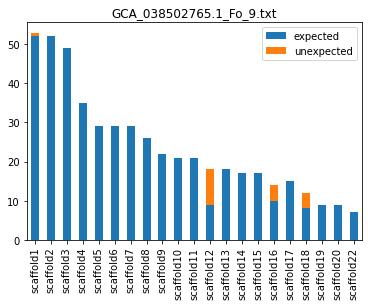

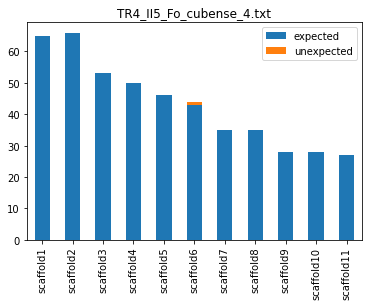

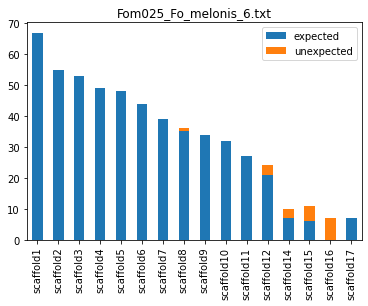

In [80]:
for file in os.listdir('../chrom_overview_2/scaff_split/')[0:10]:
    c_weird_windows = 0
    if file.endswith('.txt'):
        with open(f'../chrom_overview_2/scaff_split/{file}') as infile:
            for line in infile:
                c_weird_windows +=1 

            pd.read_csv(f'../chrom_overview_2/scaff_split/{file.replace(".txt", "_scaffstats.csv")}', index_col = 0).T[['expected', 'unexpected']].plot.bar(stacked = True)
            plt.title(f'{file}')
            plt.show()
        
    #print(file, c_weird_windows)

In [117]:
 # Function to find the block starting from a specific key
def find_block(d, start_key, direction, key_mapping):
        block = []
        comm = []
        start_value = d[start_key]
        start_int_key = int(start_key.strip('*'))
        block.append(start_key)
        
        # Iterate through the sorted keys starting from start_int_key
        current_key = start_int_key
        while True:
            next_key = current_key + (100000 * direction)

            if next_key in key_mapping and d[key_mapping[next_key]] == start_value:
                comm.append(d[key_mapping[next_key]])
                block.append(key_mapping[next_key])
                current_key = next_key
            else:
                break
        
        return block, comm

def find_blocks_from_specific_keys(d):
    # Define the starting keys
    start_keys = [x for x in d.keys() if '*' in x]
    
    # Convert the keys to integers and create a mapping to original keys
    key_mapping = {int(key.strip('*')): key for key in d.keys()}
    keys = sorted(key_mapping.keys())
    
    # Initialize a list to hold the result
    result = []
    comms = []
    
    # Collect blocks starting from specified keys
    for start_key in start_keys:
        if start_key in d:
            if start_key.startswith('*'):
                blocks,comm = find_block(d, start_key, 1, key_mapping)
                result.append(blocks)  # Forward direction
                comms.append(comm)
            elif start_key.endswith('*'):
                blocks,comm = find_block(d, start_key, -1, key_mapping)
                result.append(blocks) # Backward direction
                comms.append(comm)
                
    return result, comms

# Example dictionary
d = {'*0': '8', '100000': '8', '200000': '8', '3900000': '8', '4000000': '8', '4100000*': '8'}

# Find the blocks starting from specific keys
blocks = find_blocks_from_specific_keys(d)
print(blocks)

([['*0', '100000', '200000'], ['4100000*', '4000000', '3900000']], [['8', '8'], ['8', '8']])


In [118]:
total_split = []
total_intact = []

for file in os.listdir('../chrom_overview_2/scaff_split/'):
    c_weird_windows = 0
    if file.endswith('.txt'):
        with open(f'../chrom_overview_2/scaff_split/{file}') as infile:
            print(file)
            ww_dict = json.load(infile)
            
            for scaff, ww in ww_dict.items():
                splittable = False
                blocks, comms = find_blocks_from_specific_keys(ww)
                if len(blocks) < 1:
                    splittable = False
                elif len(blocks) >= 1:
                    splittable = any(len(b) >= 10 for b in blocks)
                    blocks = [b for b in blocks if len(b) >= 10]
                    comms = [set(c) for c in comms if len(c) >= 10]
                
                if splittable:
                    #total_split += 1
                    for b in blocks:
                        print(min(b), max(b))
                        total_split.append((file,scaff, min(b), max(b), comms))
                else:
                    total_intact.append(file)
                
                

GCA_019593505.1_Fo_niveum_4.txt
GCA_019671045.1_Fo_lini_3.txt
Fom021_Fo_melonis_4.txt
GCA_038502765.1_Fo_9.txt
TR4_II5_Fo_cubense_4.txt
Fom025_Fo_melonis_6.txt
GCA_038050555.1_Fo_vasinfectum_9.txt
GCA_014843565.1_Fo_apii_2.txt
GCA_019593445.1_Fo_niveum_1.txt
GCA_016801315.1_Fo_capsici_1.txt
3500000 7800000*
*0 900000
GCA_014843415.1_Fo_coriandrii_1.txt
*0 900000
GCA_009602635.1_Fo_vasinfectum_5.txt
GCA_015345885.1_Fo_lycopersici_1.txt
GCA_035772935.1_Fo_8.txt
Fom024_Fo_melonis_5.txt
3400000 5000000*
GCA_013085055.1_FoFo47_1.txt
Fom010_Fo_melonis_1.txt
GCA_016164145.2_Fo_fragariae_1.txt
GCA_032878545.1_Fo_vasinfectum_7.txt
Fol007_Fo_lycopersici_1.txt
GCA_025177585.1_Fo_15.txt
GCA_020744355.1_Fo_13.txt
3300000 5800000*
GCA_001703205.2_Fo_melonis_1.txt
GCA_007994515.1_Fo_cubense_2.txt
GCA_009602625.1_Fo_vasinfectum_4.txt
GCA_002318975.1_Fo_melonis_2.txt
C135_Fo_cubense_10.txt
*0 900000
GCA_013347535.2_Fo_spinaciae_2.txt
36102_Fo_cubense_6.txt
GCA_019157275.1_Fo_raphani_1.txt
*0 900000
GCA

In [119]:
total_split

[('GCA_016801315.1_Fo_capsici_1.txt',
  'scaffold1',
  '3500000',
  '7800000*',
  [{'5'}]),
 ('GCA_016801315.1_Fo_capsici_1.txt', 'scaffold5', '*0', '900000', [{'10'}]),
 ('GCA_014843415.1_Fo_coriandrii_1.txt',
  'scaffold2',
  '*0',
  '900000',
  [{'10'}]),
 ('Fom024_Fo_melonis_5.txt', 'scaffold5', '3400000', '5000000*', [{'9'}]),
 ('GCA_020744355.1_Fo_13.txt', 'scaffold2', '3300000', '5800000*', [{'9'}]),
 ('C135_Fo_cubense_10.txt', 'scaffold8', '*0', '900000', [{'8'}]),
 ('GCA_019157275.1_Fo_raphani_1.txt', 'scaffold4', '*0', '900000', [{'3'}]),
 ('GCA_017979615.1_Fo_sesami_1.txt', 'scaffold2', '*0', '900000', [{'9'}]),
 ('GCA_030064525.1_Fo_4.txt', 'scaffold1', '*0', '900000', [{'4'}]),
 ('GCA_014843445.1_Fo_coriandrii_2.txt',
  'scaffold2',
  '*0',
  '900000',
  [{'10'}]),
 ('GCA_032991405.1_Fo_vasinfectum_8.txt',
  'scaffold1',
  '5900000',
  '9400000*',
  [{'0'}]),
 ('Fom011_Fo_melonis_2.txt', 'scaffold1', '*0', '900000', [{'1'}]),
 ('Fom011_Fo_melonis_2.txt', 'scaffold3', '*0',

In [124]:
len(set([x[0] for x in total_split]))

16

In [120]:
len(total_split)

20

In [121]:
len(total_intact)

393

In [140]:
def open_windows(wfile):
    stops = {}
    with open(wfile) as infile:
        for line in infile:
            chrom = line.split('\t')[0].split('#')[1]
            stop = int(line.split('\t')[1])
            stops[chrom] = stop
    return stops

In [145]:
for z in total_split:
    file = z[0]
    stops = open_windows(f"../genomes/new_set/clean_data/{file.strip('.txt')}.clean.fa.fai")
    chrom = z[1]
    print(stops[chrom])
    start = z[2].strip('*')
    stop = z[3].strip('*')
    comm_to_find = z[4]
    

7838233
4962668
6210198
5033587
5879838
3602807
5223132
6041444
10169858
6116533
9462447
6605527
5476445
2461247
7512161
5221028
4998171
6447936
6759240
5801746


In [127]:
chrom

'scaffold2'

In [128]:
start

'0'

In [129]:
stop

'900000'